In [59]:
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
# install newest version of opencv to use SIFT
!pip install opencv-contrib-python==4.4.0.44
!pip install opencv-python==4.4.0.44
import os
import cv2
print(cv2.__version__)
import pickle as pkl

from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/caltech-101/ .
!cp /content/drive/MyDrive/Caltech-dataset/ .

4.4.0
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: -r not specified; omitting directory '/content/drive/MyDrive/caltech-101/'
cp: -r not specified; omitting directory '/content/drive/MyDrive/Caltech-dataset/'


4.4.0


'\ndef descriptors_to_hist(descriptors,model):\n    des = descriptors[0:20]\n    hist = np.zeros(50, dtype=np.float32)\n    for i in model.predict(des):\n        hist[i] += 1\n    return hist\n    '

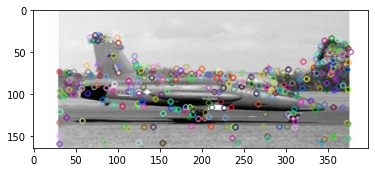

In [ ]:
!pip install opencv-contrib-python==4.4.0.44
!pip install opencv-python==4.4.0.44

# Check the SIFT effect
img=cv2.imread('/content/drive/MyDrive/Caltech-dataset/airplanes/image_0001.jpg')

gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

print(cv2.__version__)
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img,None)
# Show keypoints on the image
img_1 = cv2.drawKeypoints(gray,keypoints_1,img)
plt.imshow(img_1)


In [ ]:

all_descriptors=[]
min=10000
for des_name in os.listdir('/content/drive/MyDrive/Caltech-dataset/Leopards'):
    pkl_name = '/content/drive/MyDrive/Caltech-dataset/Leopards/'+des_name
    
    des = cv2.imread(pkl_name)
    
    sift = cv2.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(des,None)

    # check the minimum number of descriptors and choose equal descriptors in each image
    x,y=np.shape(descriptors_1)
    if min>x:
      min=x

# Repeat the process in dolphin and airplane
for des_name in os.listdir('/content/drive/MyDrive/Caltech-dataset/dolphin'):
    pkl_name = '/content/drive/MyDrive/Caltech-dataset/dolphin/'+des_name
    
    des = cv2.imread(pkl_name)
    
    sift = cv2.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(des,None)

    x,y=np.shape(descriptors_1)
    if min>x:
      min=x

for des_name in os.listdir('/content/drive/MyDrive/Caltech-dataset/airplanes'):
    pkl_name = '/content/drive/MyDrive/Caltech-dataset/airplanes/'+des_name
    
    des = cv2.imread(pkl_name)
    
    sift = cv2.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(des,None)

    x,y=np.shape(descriptors_1)
    if min>x:
      min=x

# Choose equal number of descriptors
for des_name in os.listdir('/content/drive/MyDrive/Caltech-dataset/Leopards'):
    pkl_name = '/content/drive/MyDrive/Caltech-dataset/Leopards/'+des_name
    
    des = cv2.imread(pkl_name)
    
    sift = cv2.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(des,None)
    descriptors=descriptors_1[0:min]    
    
    all_descriptors.append(descriptors)
print(np.shape(all_descriptors))  

for des_name in os.listdir('/content/drive/MyDrive/Caltech-dataset/dolphin'):
    pkl_name = '/content/drive/MyDrive/Caltech-dataset/dolphin/'+des_name
    
    des = cv2.imread(pkl_name)
    
    sift = cv2.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(des,None)
    descriptors=descriptors_1[0:min]    
    
    all_descriptors.append(descriptors)
print(np.shape(all_descriptors))  

for des_name in os.listdir('/content/drive/MyDrive/Caltech-dataset/airplanes'):
    pkl_name = '/content/drive/MyDrive/Caltech-dataset/airplanes/'+des_name
    
    des = cv2.imread(pkl_name)
    
    sift = cv2.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(des,None)
    descriptors=descriptors_1[0:min]    
    
    all_descriptors.append(descriptors)

# Check whether the shape of descriptors matches the number of images
print(np.shape(all_descriptors)) 




(200, 36, 128)
(265, 36, 128)
(1065, 36, 128)


In [ ]:
# Get the shape of the descripters array
train_descriptors = np.vstack((all_descriptors[0:180], all_descriptors[200:259],all_descriptors[266:985]))
test_descriptors = np.vstack((all_descriptors[180:200],all_descriptors[259:266], all_descriptors[985:1065]))

train_descriptors = train_descriptors
train_descriptors_stacked = np.vstack(d for d in train_descriptors)
all_descriptors = np.vstack(d for d in all_descriptors)
print(np.shape(train_descriptors))
# Stack descriptors of over 1000 images into one dimension
test_descriptors = test_descriptors
test_descriptors_stacked = np.vstack(d for d in test_descriptors)

print(np.shape(test_descriptors))

(958, 36, 128)
(107, 36, 128)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


K-Means method

In [68]:
np.random.seed(1)

# K-means method
class KMeans(object):

    def __init__(self):  
        pass

    def pairwise_dist(self, x, y): 
        sqx = np.sum(np.square(x),axis=1);
        sqy = np.sum(np.square(y),axis=1);
        mul = np.dot(x, y.T);
        dists = np.sqrt(abs(sqx[:, np.newaxis] + sqy - 2 * mul))
        return dists
    # Select initial centroids
    def _init_centers(self, points, K, **kwargs): 
        
        row, column = points.shape
        center = np.empty([K, column])
        for i in range(K):
            randIndex = np.random.randint(row)
            center[i] = points[randIndex]
        
        return center
    # Compare and update new centroids and clusters
    def _update_assignment(self, centers, points): 
        row, column = points.shape
        cluster_idx = np.empty([row])
        distance = self.pairwise_dist(points, centers)
        cluster_idx = np.argmin(distance, axis=1)
        return cluster_idx

    def _update_centers(self, old_centers, cluster_idx, points): 
        row,column = old_centers.shape
        new_centers = np.empty(old_centers.shape)
        for i in range(row):
            new_centers[i] = np.mean(points[cluster_idx == i], axis = 0)
        return new_centers
    # Calculate the loss until acceptable
    def _get_loss(self, centers, cluster_idx, points): 
        dists = self.pairwise_dist(points, centers)
        loss = 0.0
        row,column = points.shape
        for i in range(row):
            loss = loss + np.square(dists[i][cluster_idx[i]])
        
        return loss
    # Call the functions and predict
    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, verbose=False, **kwargs):
        
        centers = self._init_centers(points, K, **kwargs)
        for x in range(max_iters):
            cluster_idx = self._update_assignment(centers, points)
            centers = self._update_centers(centers, cluster_idx, points)
            loss = self._get_loss(centers, cluster_idx, points)
            K = centers.shape[0]
            if x:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            if verbose:
                print('iter %d, loss: %.4f' % (x, loss))
        return cluster_idx, centers, loss



In [ ]:
kmeans=KMeans()
k = 6
# check the shape and value of descriptors for training after stack
print(train_descriptors_stacked)
print(train_descriptors_stacked.astype(int))
cluster_idx, centers, loss = KMeans()(train_descriptors_stacked, k)

print(cluster_idx)
print(np.shape(centers))

[[  6.   1.   0. ...   0.   0.  38.]
 [ 29.   3.   0. ...  28.  23.   4.]
 [  1.   0.   0. ...  29.  21.   6.]
 ...
 [ 40. 116.   6. ...   0.   0.   0.]
 [ 24.   6.   6. ...   0.   0.   7.]
 [  1.  13. 128. ...   2.   1.  15.]]
[[  6   1   0 ...   0   0  38]
 [ 29   3   0 ...  28  23   4]
 [  1   0   0 ...  29  21   6]
 ...
 [ 40 116   6 ...   0   0   0]
 [ 24   6   6 ...   0   0   7]
 [  1  13 128 ...   2   1  15]]
[2 2 2 ... 2 1 0]
(6, 128)


[ 2.  9.  3. 15.  6.  1.]


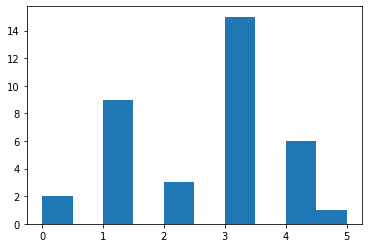

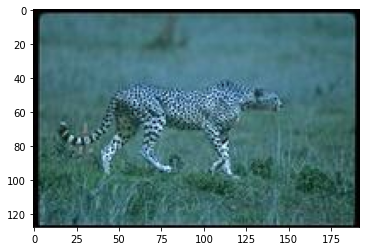

In [ ]:

# Calculate the distance between descriptors and centroids 
def des_to_hist(des):
  hist=np.zeros([len(des), 6])
  for i in range(len(des)):       
    for j in range(36):
      minindex=-1
      min=10000 
      # Judge which centroid is the nearest
      for k in range(6):
        if min > np.linalg.norm(des[i][j]-centers[k]):
          min = np.linalg.norm(des[i][j]-centers[k])
          minindex = k
      hist[i][minindex]+=1
  return hist
    
X = des_to_hist(train_descriptors)

# Print histogram for image 1
print(X[0]) 
y=np.zeros(36)
count=0
for i in range(6):
  for j in range(X[0][i].astype(int)):
    y[count] = i
    count+=1

plt.hist(y)
plt.show() 
img = cv2.imread('/content/drive/MyDrive/Caltech-dataset/Leopards/image_0001.jpg')
plt.imshow(img)


Train a SVM Model


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

y1 = np.zeros([180])
y2 = np.full((58),1)
y3 = np.full((720),2)
y = np.hstack((y1,y2,y3))
# Use SVM to classify
clf = OneVsRestClassifier(SVC()).fit(X, y)



Test Model

In [66]:
# Test Leopard
kmeans=KMeans()
#Define the shape of descriptors and number of clusters

k = 6

cluster_idx, centers, loss = KMeans()(test_descriptors_stacked, k)

X = des_to_hist(test_descriptors)

ans = np.empty(20)
for i in range(20):
  ans[i]=(clf.predict(X[i].reshape(1, -1)))


a=np.zeros(3)
for i in range(20):
  a[int(ans[i])]+=1
print("there is "+a[0].astype(str) + " picture(s) being predicted as leopards, which is correct" )
print("there is "+a[1].astype(str) + " picture(s) being predicted as dolphin, which is incorrect" )
print("there is "+a[2].astype(str) + " picture(s) being predicted as airplanes, which is incorrect" )

there is 19.0 picture(s) being predicted as leopards, which is correct
there is 0.0 picture(s) being predicted as dolphin, which is incorrect
there is 1.0 picture(s) being predicted as airplanes, which is incorrect


In [65]:
# Test Dolphin
for i in range(8):
  ans[i]=(clf.predict(X[20+i].reshape(1, -1)))



a=np.zeros(3)
for i in range(8):
  a[int(ans[i])]+=1

print("there is "+a[0].astype(str) + " picture(s) being predicted as leopards, which is incorrect" )
print("there is "+a[1].astype(str) + " picture(s) being predicted as dolphin, which is correct" )
print("there is "+a[2].astype(str) + " picture(s) being predicted as airplanes, which is incorrect" )

there is 0.0 picture(s) being predicted as leopards, which is incorrect
there is 7.0 picture(s) being predicted as dolphin, which is correct
there is 1.0 picture(s) being predicted as airplanes, which is incorrect


In [ ]:
# Test Airplane
for i in range(80):
  ans[i]=(clf.predict(X[28+i].reshape(1, -1)))


a=np.zeros(3)
for i in range(80):
  a[int(ans[i])]+=1

print("there is "+ a[0].astype(str) + " picture(s) being predicted as leopards, which is incorrect" )
print("there is "+ a[1].astype(str) + " picture(s) being predicted as dolphin, which is incorrect" )
print("there is "+ a[2].astype(str) + " picture(s) being predicted as airplanes, which is correct" )

there is 6.0 picture(s) being predicted as leopards, which is incorrect
there is 3.0 picture(s) being predicted as dolphin, which is incorrect
there is 71.0 picture(s) being predicted as airplanes, which is correct


In [58]:
# Print the confusion matrix
print("N/A    Leopards    Dolphin   Airplanes")
print("Leopards   19         0             1")
print("Dolphin     0         7             1")
print("Airplanes   6         3            71")

N/A    Leopards    Dolphin   Airplanes
Leopards   19         0             1
Dolphin     0         7             1
Airplanes   6         3            71
